# LP#43 반복수가같은 일원배치

In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('One-way ANOVA.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,인장강도,온도
0,8.44,1
1,8.36,1
2,8.28,1
3,8.59,2
4,8.91,2
5,8.60,2
6,9.34,3
7,9.41,3
8,9.69,3
9,8.92,4


In [6]:
# the "C" indicates categorical data
model = ols('인장강도 ~ C(온도)', df).fit()

print(anova_lm(model))

           df  sum_sq  mean_sq          F    PR(>F)
C(온도)     3.0  1.9788  0.65960  31.186761  0.000092
Residual  8.0  0.1692  0.02115        NaN       NaN


## <font color = red>ANOVA TABLE</font>
|  |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(반응온도)|3.0 | 1.9788  |0.65960 | 31.186761  |0.000092|
|Residual(오차)|8.0 | 0.1692|  0.02115 | 

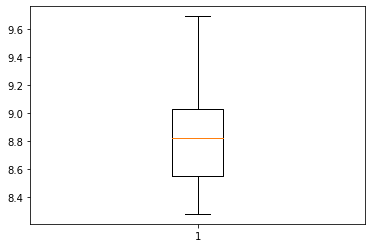

In [9]:
plot_data = [df['인장강도']]
ax = plt.boxplot(plot_data)
plt.show()

# LP#47 반복없는 이원배치

In [86]:
data = pd.read_csv('Two-way ANOVA.csv')

In [87]:
df = pd.DataFrame(data)

In [88]:
df

,수율,반응온도,압력
0,97.60000,1,1
1,97.30000,1,2
2,96.70000,1,3
3,98.60000,2,1
4,98.20000,2,2
5,96.90000,2,3
6,99.00000,3,1
7,98.00000,3,2
8,97.90000,3,3
9,98.00000,4,1


In [91]:
pd.options.display.float_format = '{:.5f}'.format
formula = '수율 ~ C(반응온도)+C(압력)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

              df  sum_sq  mean_sq        F  PR(>F)
C(반응온도)  3.00000 2.22000  0.74000  7.92857 0.01647
C(압력)    2.00000 3.44000  1.72000 18.42857 0.00274
Residual 6.00000 0.56000  0.09333      NaN     NaN


## <font color = red>ANOVA TABLE</font>
|  |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(반응온도)| 3.00000 |2.22000 | 0.74000 | 7.92857 |0.01647|
|B(압력)|2.00000 |3.44000|  1.72000| 18.42857| 0.00274|
|Residual(오차)|6.00000 |0.56000 | 0.09333| |  |     

# LP#3-2-2-2-1난괴법

In [120]:
data = pd.read_csv('RBD.csv')

In [121]:
df = pd.DataFrame(data)

In [122]:
df

,결정화도변화율,온도,습도
0,13.10000,1,1
1,12.90000,1,2
2,13.40000,1,3
3,12.40000,2,1
4,12.70000,2,2
5,12.50000,2,3
6,12.30000,3,1
7,12.00000,3,2
8,12.20000,3,3


In [123]:
pd.options.display.float_format = '{:.5f}'.format
formula = '결정화도변화율 ~ C(온도)+C(습도)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

              df  sum_sq  mean_sq        F  PR(>F)
C(온도)    2.00000 1.42889  0.71444 16.07500 0.01224
C(습도)    2.00000 0.04222  0.02111  0.47500 0.65299
Residual 4.00000 0.17778  0.04444      NaN     NaN


## <font color = red>ANOVA TABLE</font>
|  |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(온도)| 2.00000| 1.42889|  0.71444| 16.07500 |0.01224|
|B(습도)| 2.00000 |0.04222|  0.02111|  0.47500| 0.65299|
|Residual(오차)|4.00000| 0.17778 | 0.04444  |

### Pooling

In [127]:
model = ols('결정화도변화율 ~ C(온도)', df).fit()

print(anova_lm(model))

              df  sum_sq  mean_sq        F  PR(>F)
C(온도)    2.00000 1.42889  0.71444 19.48485 0.00238
Residual 6.00000 0.22000  0.03667      NaN     NaN


## <font color = red>ANOVA TABLE</font>
|  |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(반응온도)|2.00000| 1.42889  |0.71444 |19.48485 |0.00238|
|Residual(오차)|6.00000 |0.22000|  0.03667|

# LP#48 반복있는 이원배치

In [92]:
data = pd.read_csv('1two-way ANOVA.csv')

In [93]:
df = pd.DataFrame(data)

In [94]:
df

,압축강도,석고종류,첨가량
0,305,1,1
1,302,1,1
2,335,1,2
3,337,1,2
4,366,1,3
5,364,1,3
6,372,1,4
7,374,1,4
8,376,1,5
9,373,1,5


In [97]:
pd.options.display.float_format = '{:.5f}'.format
formula = '압축강도 ~ C(석고종류) + C(첨가량) + C(석고종류):C(첨가량)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                     df     sum_sq    mean_sq         F  PR(>F)
C(석고종류)         2.00000 3088.22222 1544.11111 694.85000 0.00000
C(첨가량)          5.00000 5548.88889 1109.77778 499.40000 0.00000
C(석고종류):C(첨가량) 10.00000 4825.77778  482.57778 217.16000 0.00000
Residual       18.00000   40.00000    2.22222       NaN     NaN


## <font color = red>ANOVA TABLE</font>
|   |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(석고종류)|2.00000| 3088.22222 |1544.11111| 694.85000 |0.00000|
|B(첨가량)|5.00000|5548.88889|1109.77778|499.40000|0.00000|
|A(석고종류)XB(첨가량)|10.00000|4825.77778|482.57778|217.16000|0.00000|
|Residual(오차)|18.00000|40.00000|2.22222|     |    |

# LP#3-4 반복없는 삼원배치법

In [109]:
data = pd.read_csv('Three-way ANOVA.csv')

In [110]:
df = pd.DataFrame(data)

In [111]:
df

,합성률,반응압력,반응시간,반응온도
0,74,1,1,1
1,86,1,1,2
2,76,1,1,3
3,72,1,2,1
4,91,1,2,2
5,87,1,2,3
6,48,1,3,1
7,65,1,3,2
8,56,1,3,3
9,61,2,1,1


In [114]:
pd.options.display.float_format = '{:.5f}'.format
formula = '합성률 ~ C(반응압력) + C(반응시간) + C(반응온도) + C(반응압력):C(반응시간)+ C(반응압력):C(반응온도) + C(반응시간):C(반응온도)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                     df     sum_sq   mean_sq         F  PR(>F)
C(반응압력)         2.00000  743.62963 371.81481 164.57377 0.00000
C(반응시간)         2.00000  753.40741 376.70370 166.73770 0.00000
C(반응온도)         2.00000 1380.96296 690.48148 305.62295 0.00000
C(반응압력):C(반응시간) 4.00000  651.92593 162.98148  72.13934 0.00000
C(반응압력):C(반응온도) 4.00000    9.03704   2.25926   1.00000 0.46091
C(반응시간):C(반응온도) 4.00000   56.59259  14.14815   6.26230 0.01384
Residual        8.00000   18.07407   2.25926       NaN     NaN


## <font color = red>ANOVA TABLE</font>
|   |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(반응압력)              |2.00000|  743.62963| 371.81481| 164.57377| 0.00000|
|B(반응시간)              |2.00000|  753.40741| 376.70370| 166.73770| 0.00000|
|C(반응온도)              |2.00000| 1380.96296| 690.48148| 305.62295| 0.00000|
|A(반응압력) X B(반응시간)|4.00000|  651.92593| 162.98148|  72.13934| 0.00000|
|A(반응압력) X C(반응온도)|4.00000|    9.03704|   2.25926|   1.00000| 0.46091|
|B(반응시간) X C(반응온도)|4.00000|   56.59259|  14.14815|   6.26230| 0.01384|
|Residual(오차)           |8.00000|   18.07407|   2.25926|          |        |

### Pooling

In [116]:
pd.options.display.float_format = '{:.5f}'.format
formula = '합성률 ~ C(반응압력) + C(반응시간) + C(반응온도) + C(반응압력):C(반응시간) + C(반응시간):C(반응온도)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                      df     sum_sq   mean_sq         F  PR(>F)
C(반응압력)          2.00000  743.62963 371.81481 164.57377 0.00000
C(반응시간)          2.00000  753.40741 376.70370 166.73770 0.00000
C(반응온도)          2.00000 1380.96296 690.48148 305.62295 0.00000
C(반응압력):C(반응시간)  4.00000  651.92593 162.98148  72.13934 0.00000
C(반응시간):C(반응온도)  4.00000   56.59259  14.14815   6.26230 0.00584
Residual        12.00000   27.11111   2.25926       NaN     NaN


## <font color = red>ANOVA TABLE</font>
|   |df|SS|MS|F비|P-value| 
|:---|:---:|:---:|:---:|:----:|:----:|
|A(반응압력)              |2.00000|  743.62963| 371.81481| 164.57377| 0.00000|
|B(반응시간)              |2.00000|  753.40741| 376.70370| 166.73770| 0.00000|
|C(반응온도)              |2.00000| 1380.96296| 690.48148| 305.62295| 0.00000|
|A(반응압력) X B(반응시간)|4.00000|  651.92593| 162.98148|  72.13934| 0.00000|
|B(반응시간) X C(반응온도)|4.00000|   56.59259|  14.14815|   6.26230| 0.00584|
|Residual(오차)           |12.00000|   27.11111|   2.25926|||       